Context:

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**

        N - ratio of Nitrogen content in soil

        P - ratio of Phosphorous content in soil

        K - ratio of Potassium content in soil

        temperature - temperature in degree Celsius

        humidity - relative humidity in %

        ph - ph value of the soil

        rainfall - rainfall in mm

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# helper functions


In [40]:
def plot_distribution(df, feature):
    """
    Plot the distribution of a feature in the DataFrame along with additional statistics.
    
    Parameters:
    df (DataFrame): The DataFrame containing the dataset.
    feature (str): The name of the feature (column) for which to plot the distribution.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Calculate IQR and outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    num_outliers = outliers.count()
    
    # Calculate percentage of outliers
    total_observations = len(df)
    percentage_outliers = (num_outliers / total_observations) * 100
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=feature, color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.grid(True)
    
    # Annotate the boxplot with IQR and outliers
    plt.text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='right')
    plt.text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='right')
    plt.text(1.1, lower_bound, f'Lower Bound: {lower_bound:.2f}', fontsize=10, ha='right')
    plt.text(1.1, upper_bound, f'Upper Bound: {upper_bound:.2f}', fontsize=10, ha='right')

   
    
    plt.tight_layout()
    plt.show()

    # Calculate statistics
    mean = df[feature].mean()
    median = df[feature].median()
    std_dev = df[feature].std()
    feature_range = df[feature].max() - df[feature].min()
    min_value = df[feature].min()
    max_value = df[feature].max()

    print(f"Statistics for {feature}:\n")
    print(f"Max value: {max_value:.2f}")
    print(f"Min value: {min_value:.2f}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Range: {feature_range:.2f}")
    print(f"Number outliers: {num_outliers:.2f} ({percentage_outliers:.2f}%"')')


# loading and exploring the dataset

In [4]:
PATH = r'data\Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [8]:
print("\nFirst few rows:")
df.head()


First few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
print("\nLast few rows:")
df.tail()


Last few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
print("DataFrame Shape:", df.shape)

DataFrame Shape: (2200, 8)


In [12]:
print("DataFrame Features:", df.columns)


DataFrame Features: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [15]:
print("DataFrame Information:\n")
df.info()

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [19]:
print("Descriptive Statistics:\n")
df.describe()

Descriptive Statistics:



,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [20]:
print("Null Value Counts:\n")
display(df.isnull().sum())

Null Value Counts:



N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Univariate analysis

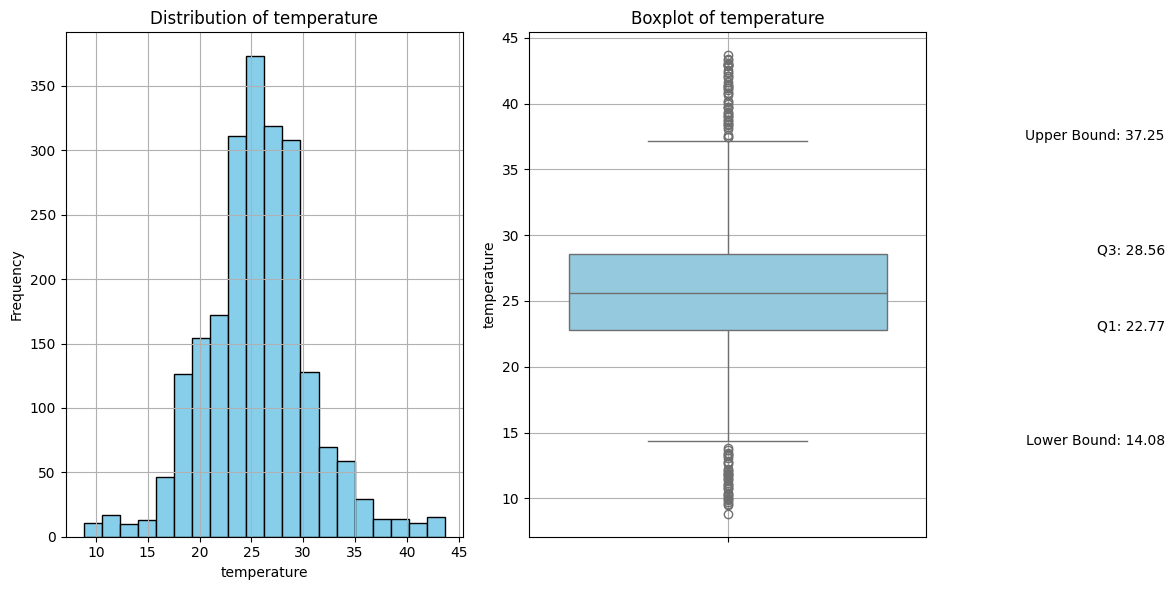

Statistics for temperature:

Max value: 43.68
Min value: 8.83
Mean: 25.62
Median: 25.60
Standard Deviation: 5.06
Range: 34.85
Number outliers: 86.00 (3.91%)


In [41]:
plot_distribution(df, 'temperature')

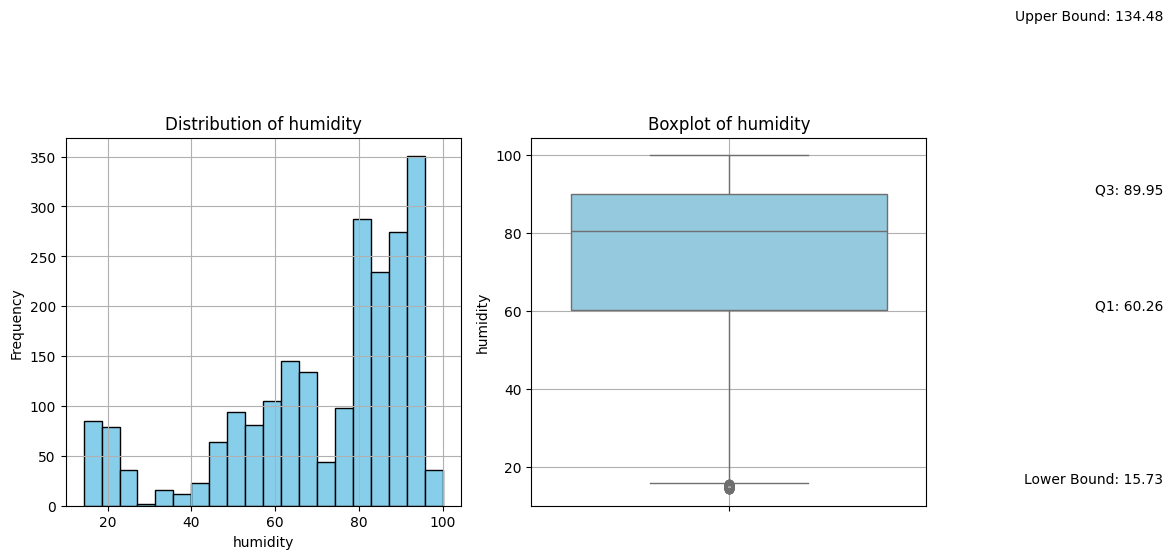

Statistics for humidity:

Max value: 99.98
Min value: 14.26
Mean: 71.48
Median: 80.47
Standard Deviation: 22.26
Range: 85.72
Number outliers: 30.00 (1.36%)


In [42]:
plot_distribution(df, 'humidity')